In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [22]:
def evaluate(d):
    mse_f = np.mean(d**2)
    mae_f = np.mean(abs(d))
    rmse_f = np.sqrt(mse_f)
    print("MAE:",mae_f)
    print("MSE:", mse_f)
    print("RMSE:", rmse_f)

In [4]:
# import data
data_set = pd.read_csv('airline_passengers.csv',infer_datetime_format=True,parse_dates=["Month"],index_col=["Month"])


<AxesSubplot:xlabel='Month'>

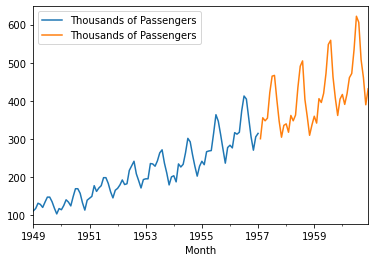

In [5]:
train, test = data_set[:'1957-01-01'].copy(), data_set['1957-01-02':].copy()
ax = train.plot()
test.plot(ax=ax)

### Naive

In [6]:
def naive(data):
    return data[-1]

In [8]:
naive_pred = naive(train['Thousands of Passengers'])
naive_pred

315

In [23]:
d = test['Thousands of Passengers'] - naive_pred
evaluate(d)

MAE: 101.80851063829788
MSE: 16066.489361702128
RMSE: 126.75365620644688


### Simple mean

In [9]:
def simple_mean(data):
    return data.mean()

In [11]:
sm_pred = simple_mean(train['Thousands of Passengers'])
sm_pred

214.75257731958763

In [24]:
d = test['Thousands of Passengers'] - sm_pred
evaluate(d)

MAE: 200.82189076551873
MSE: 46280.69754173799
RMSE: 215.12949017217045


### Last k mean

In [12]:
def lastk_mean(data, k):
    return data[-k:].mean()

In [14]:
lk_pred = lastk_mean(train['Thousands of Passengers'], k=10)
lk_pred

337.6

In [25]:
d = test['Thousands of Passengers'] - lk_pred
evaluate(d)

MAE: 83.02127659574472
MSE: 12031.283404255315
RMSE: 109.6872071130235


### visualizing the three predictions

In [26]:
test_with_pred = test
test_with_pred["naive_pred"] = naive_pred
test_with_pred["sm_pred"] = sm_pred
test_with_pred["lk_pred"] = lk_pred

<AxesSubplot:xlabel='Month'>

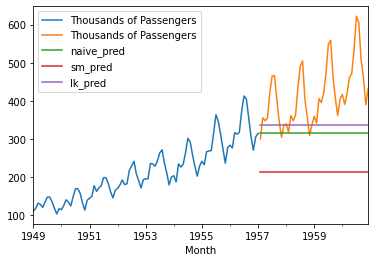

In [27]:
bx = train.plot()
test_with_pred.plot(ax=bx)

---
## **TODO: clean the remainder of the notebook**

---

### Exponential smoothing

In [30]:
from statsmodels.tsa.api import SimpleExpSmoothing, Holt, ExponentialSmoothing
import numpy as np

In [31]:
fit2 = SimpleExpSmoothing(np.asarray(train['Thousands of Passengers'])).fit(smoothing_level=0.9,optimized=False)
test['SES09'] = fit2.forecast(len(test))

/opt/conda/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [32]:
fit3 = SimpleExpSmoothing(np.asarray(train['Thousands of Passengers'])).fit(smoothing_level=0.01,optimized=False)
test['SES001'] = fit3.forecast(len(test))

In [33]:
fit3b = SimpleExpSmoothing(np.asarray(train['Thousands of Passengers'])).fit()
test['SESb'] = fit3b.forecast(len(test))

<AxesSubplot:xlabel='Month'>

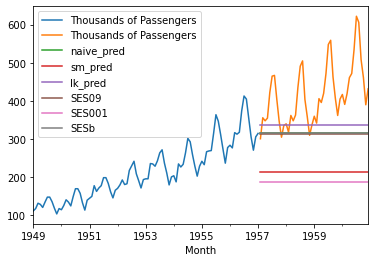

In [34]:
ax = train.plot()
test.plot(ax=ax)

### Holt's Linear method

In [35]:
fit4 = Holt(np.asarray(train['Thousands of Passengers'])).fit(smoothing_level = 0.2,smoothing_slope = 0.05)
test['Holt'] = fit4.forecast(len(test))

/opt/conda/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-35-d3e30a792169>:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit4 = Holt(np.asarray(train['Thousands of Passengers'])).fit(smoothing_level = 0.2,smoothing_slope = 0.05)


<AxesSubplot:xlabel='Month'>

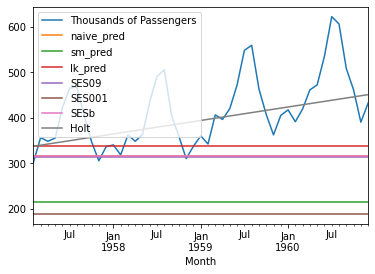

In [36]:
test.plot()

### Holt-Winters' model

In [37]:
fit5 = ExponentialSmoothing(np.asarray(train['Thousands of Passengers']) ,seasonal_periods=12 ,trend='add', seasonal='add',).fit()
test['HW'] = fit5.forecast(len(test))


/opt/conda/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


<AxesSubplot:xlabel='Month'>

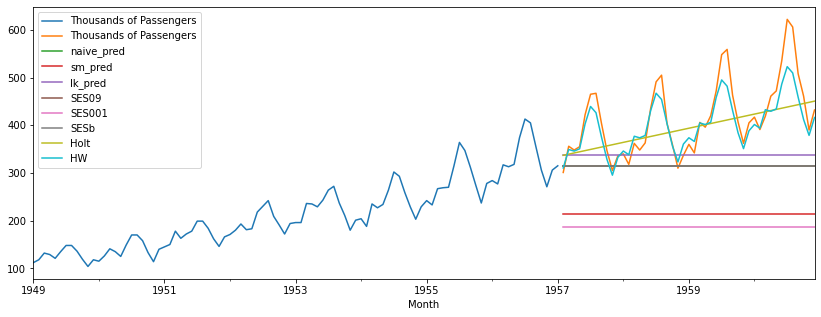

In [38]:
ax = train.plot(figsize=(14, 5))
test.plot(ax=ax)